In [4]:
import pandas as pd
import numpy as np

def random_pathways():
    # Set the years for which boundaries are specified
    specified_years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2035, 2040, 2045, 2050]

    # Set the lower and upper boundaries for emissions at specified years
    lower_boundaries = np.random.uniform(100, 300, len(specified_years))  # Replace with your specific lower bounds
    upper_boundaries = np.random.uniform(400, 800, len(specified_years))  # Replace with your specific upper bounds

    # Create a DataFrame with specified years and boundaries
    data = {'Year': specified_years, 'Lower Bound': lower_boundaries, 'Upper Bound': upper_boundaries}
    df_specified = pd.DataFrame(data)

    # Set the years for the complete time series
    all_years = np.arange(2020, 2051, 1)

    # Interpolate values for the complete time series
    df_interpolated = df_specified.set_index('Year').reindex(all_years).interpolate().reset_index()

    # Generate random pathways within the interpolated boundaries
    num_simulations = 2  # You can adjust this as needed
    emissions = np.random.uniform(df_interpolated['Lower Bound'], df_interpolated['Upper Bound'],
                                  size=(num_simulations, len(all_years)))

    # Create the final DataFrame
    columns = ['Year'] + [f'Simulation {i + 1}' for i in range(num_simulations)]
    df_final = pd.DataFrame(np.column_stack([all_years, emissions.T]), columns=columns)

    return df_final

# Example usage
random_pathway_df = random_pathways()
print(random_pathway_df)


      Year  Simulation 1  Simulation 2
0   2020.0    364.453892    302.201320
1   2021.0    331.694436    461.413847
2   2022.0    243.255391    303.382110
3   2023.0    351.314781    368.029592
4   2024.0    469.296596    465.345285
5   2025.0    667.723400    532.577791
6   2026.0    360.478215    424.349447
7   2027.0    265.956517    128.473155
8   2028.0    534.033527    449.360664
9   2029.0    338.447546    157.188434
10  2030.0    313.908584    285.097123
11  2031.0    579.675604    568.999622
12  2032.0    313.077314    426.578176
13  2033.0    279.926128    483.739288
14  2034.0    305.409473    577.276934
15  2035.0    717.611109    627.049963
16  2036.0    394.783930    484.937609
17  2037.0    280.020994    461.891821
18  2038.0    438.491442    654.315457
19  2039.0    598.450679    377.925209
20  2040.0    480.319640    491.166858
21  2041.0    363.144026    401.057278
22  2042.0    535.998469    598.927693
23  2043.0    342.492128    510.662127
24  2044.0    657.380846 

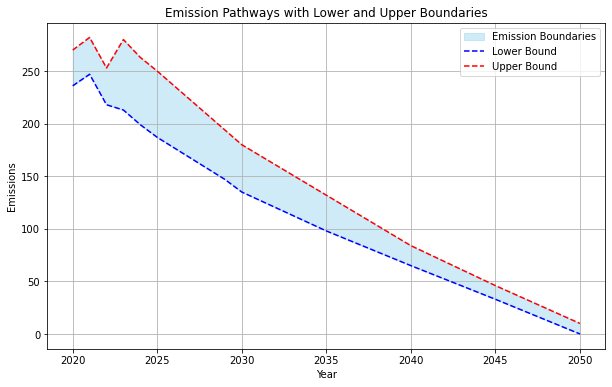

In [105]:
import matplotlib.pyplot as plt

# Provided lists
specified_years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2035, 2040, 2045, 2050]
lower_boundaries = [236, 247, 218, 213, 199, 187, 177, 167, 157, 147, 135, 98, 65, 33, 0]
upper_boundaries = [270, 282, 253, 280, 263, 250, 236, 222, 208, 194, 180, 132, 84, 46, 10]

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(specified_years, lower_boundaries, upper_boundaries, color='skyblue', alpha=0.4, label='Emission Boundaries')
plt.plot(specified_years, lower_boundaries, 'b--', label='Lower Bound')
plt.plot(specified_years, upper_boundaries, 'r--', label='Upper Bound')

plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emission Pathways with Lower and Upper Boundaries')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
import pandas as pd
import numpy as np

def generate_random_timeseries(num_runs):
    # Provided lists
    specified_years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2035, 2040, 2045, 2050]
    lower_boundaries = [236, 247, 218, 213, 199, 187, 177, 167, 157, 147, 135, 98, 65, 33, 0]
    upper_boundaries = [270, 282, 253, 280, 263, 250, 236, 222, 208, 194, 180, 132, 84, 46, 10]

    # Interpolate values for the complete time series
    all_years = np.arange(2020, 2051, 1)
    df_specified = pd.DataFrame({'Year': specified_years, 'Lower Bound': lower_boundaries, 'Upper Bound': upper_boundaries})
    df_interpolated = df_specified.set_index('Year').reindex(all_years).interpolate().reset_index()

    # Generate random values within the specified boundaries for each year and for each run
    random_emissions = np.random.uniform(df_interpolated['Lower Bound'],
                                         df_interpolated['Upper Bound'], size=(num_runs, len(all_years)))

    # Create a time series DataFrame with each column representing one run
    df_timeseries = pd.DataFrame(random_emissions.T, columns=[f'Run {i + 1}' for i in range(num_runs)], index=all_years)

    return df_timeseries

def calculate_quinquennial_sums(input_df):
    # Define the quinquennial year ranges
    year_ranges = [(2020, 2025), (2026, 2030), (2031, 2035), (2036, 2040), (2041, 2045), (2046, 2050)]

    # Initialize a list to store individual DataFrames for each quinquennial sum
    dfs_to_concat = []

    # Calculate the quinquennial sums for each run
    for column in input_df.columns:
        run_values = input_df[column].values

        quinquennial_sums = []
        for start, end in year_ranges:
            quinquennial_sum = sum(run_values[(input_df.index >= start) & (input_df.index <= end)])
            quinquennial_sums.append(quinquennial_sum)

        # Create a DataFrame for the current run's quinquennial sums
        quinquennial_sum_df = pd.DataFrame({column: quinquennial_sums}, index=[f'{start}-{end}' for start, end in year_ranges])
        dfs_to_concat.append(quinquennial_sum_df)

    # Concatenate all individual DataFrames into the final result
    quinquennial_sums_df = pd.concat(dfs_to_concat, axis=1)

    return quinquennial_sums_df

# Example usage with 3 runs
num_runs = 3
random_timeseries_df = generate_random_timeseries(num_runs)
print(random_timeseries_df)


           Run 1       Run 2       Run 3
2020  257.685945  264.426779  258.887616
2021  280.562885  275.240384  274.344192
2022  220.229903  221.079306  227.816299
2023  256.404667  265.684469  215.123381
2024  241.594003  255.130086  250.365320
2025  209.046388  234.808998  219.933516
2026  208.790088  222.526140  179.964308
2027  216.050163  186.768452  181.191398
2028  165.642414  159.466834  177.070538
2029  180.103209  149.438449  182.696018
2030  172.918513  136.210010  169.571668
2031  132.574365  138.738414  150.763720
2032  145.876458  154.112654  146.058428
2033  121.785879  139.525669  134.861361
2034  131.126305  120.644769  133.947396
2035  108.107041  123.048472  128.966701
2036  103.812948  118.878313  100.502806
2037   89.835683   85.197338  108.615366
2038   78.404240   88.236781   84.338489
2039   81.660023   85.135884   89.689352
2040   66.705013   76.852616   80.020024
2041   70.560428   59.791926   70.322273
2042   52.590862   62.986936   55.147006
2043   60.823285

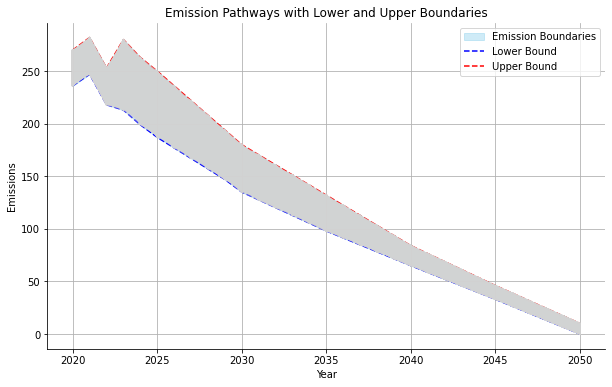

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for improved aesthetics

def plot_emission_pathways(df_timeseries, specified_years, lower_boundaries, upper_boundaries):
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot emission boundaries
    plt.fill_between(specified_years, lower_boundaries, upper_boundaries, color='skyblue', alpha=0.4, label='Emission Boundaries')
    
    # Plot lower and upper bounds
    plt.plot(specified_years, lower_boundaries, 'b--', label='Lower Bound')
    plt.plot(specified_years, upper_boundaries, 'r--', label='Upper Bound')

    # Plot all runs with light gray color and transparency
    for column in df_timeseries.columns:
        plt.plot(df_timeseries.index, df_timeseries[column], color='lightgray', alpha=0.4, label='_nolegend_')

    plt.xlabel('Year')
    plt.ylabel('Emissions')
    plt.title('Emission Pathways with Lower and Upper Boundaries')
    plt.legend()
    plt.grid(True)
    sns.despine()  # Remove the top and right spines for better aesthetics
    plt.show()

# Example usage with 3 runs
num_runs = 2000
random_timeseries_df = generate_random_timeseries(num_runs)
plot_emission_pathways(random_timeseries_df, specified_years, lower_boundaries, upper_boundaries)


In [125]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming you have quinquennial_sums_df calculated from the previous function
# Replace it with the actual DataFrame containing quinquennial sums

# Dropdown widget to select the quinquennial budget
budget_dropdown = widgets.Dropdown(
    options=quinquennial_sums_df.index,
    value=quinquennial_sums_df.index[0],
    description='Select Budget:'
)

def plot_frequency_chart(selected_budget):
    # Plotting a histogram for the selected quinquennial budget
    selected_budget_values = quinquennial_sums_df.loc[selected_budget]

    plt.figure(figsize=(10, 6))
    plt.hist(selected_budget_values, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Frequency of Values for {selected_budget}')
    plt.xlabel('Budget Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Connect the dropdown to the plotting function
widgets.interactive(plot_frequency_chart, selected_budget=budget_dropdown)


interactive(children=(Dropdown(description='Select Budget:', options=('2020-2025', '2026-2030', '2031-2035', '…

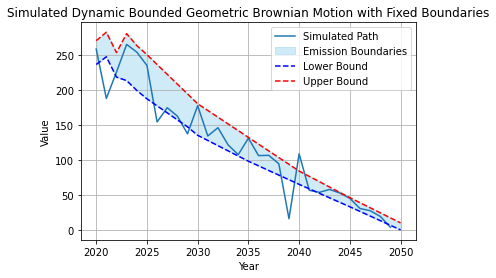

In [116]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given boundaries
specified_years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2035, 2040, 2045, 2050]
lower_boundaries = [236, 247, 218, 213, 199, 187, 177, 167, 157, 147, 135, 98, 65, 33, 0]
upper_boundaries = [270, 282, 253, 280, 263, 250, 236, 222, 208, 194, 180, 132, 84, 46, 10]

# Create a time series DataFrame with yearly granularity
years_interpolated = np.arange(2020, 2051, 1)
lower_boundaries_interpolated = np.interp(years_interpolated, specified_years, lower_boundaries)
upper_boundaries_interpolated = np.interp(years_interpolated, specified_years, upper_boundaries)


import numpy as np
import matplotlib.pyplot as plt
from numpy import random

def simulate_dynamic_bounded_geometric_brownian_motion(start_year, end_year, mu, sigma, dt, initial_value, lower_boundaries, upper_boundaries):
    num_steps = int((end_year - start_year) / dt)
    years = np.arange(start_year, end_year, dt)
    path = np.zeros(num_steps)
    path[0] = initial_value  # Initial value

    for i in range(1, num_steps):
        # Update boundaries dynamically based on the current value
        lower_boundary = lower_boundaries[i]
        upper_boundary = upper_boundaries[i]

        # Simulate geometric Brownian motion
        increment = np.sqrt(dt) * np.random.randn()
        path[i] = path[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * increment)

        # Adjust for dynamically changing boundaries
        if path[i] > upper_boundary:
            path[i] = 2 * upper_boundary - path[i]
        elif path[i] < lower_boundary:
            path[i] = 2 * lower_boundary - path[i]

    return years, path

# Given fixed boundaries
start_year = 2020
end_year = 2050
mu = 0.1  # Drift
sigma = 0.2  # Volatility
dt = 1  # Yearly granularity
initial_value = random.randint(lower_boundaries[0],upper_boundaries[0])

# Use fixed boundaries directly
lower_boundaries_fixed = lower_boundaries_interpolated
upper_boundaries_fixed = upper_boundaries_interpolated

# Simulate dynamic bounded geometric Brownian motion with fixed boundaries
years, dynamic_bounded_path = simulate_dynamic_bounded_geometric_brownian_motion(start_year, end_year, mu, sigma, dt, initial_value, lower_boundaries_fixed, upper_boundaries_fixed)

# Plotting
plt.plot(years, dynamic_bounded_path, label='Simulated Path')
plt.fill_between(specified_years, lower_boundaries, upper_boundaries, color='skyblue', alpha=0.4, label='Emission Boundaries')
plt.plot(specified_years, lower_boundaries, 'b--', label='Lower Bound')
plt.plot(specified_years, upper_boundaries, 'r--', label='Upper Bound')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Simulated Dynamic Bounded Geometric Brownian Motion with Fixed Boundaries')
plt.legend()
plt.grid(True)
plt.show()
